In [38]:
import numpy as np
import matplotlib.pyplot as plt

class LR:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.mse_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate MSE
            mse = np.mean((y_predicted - y) ** 2)
            self.mse_history.append(mse)

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        y_predicted[y_predicted >= 0] = 1
        y_predicted[y_predicted < 0] = -1
        return y_predicted

    def mse(self, X, y):
        y_predicted = self.predict(X)
        return np.mean((y_predicted - y) ** 2)

    def plot_mse(self):
        plt.plot(range(1, self.n_iterations + 1), self.mse_history, marker='o')
        plt.title('Mean Squared Error During Training')
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.grid(True)
        plt.show()

In [33]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            fn = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(fn)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        fn = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(fn)
        y_predicted_cls = [1 if i > 0.5 else -1 for i in y_predicted]
        return y_predicted_cls


Total Accuracy: 1.0
Mean Squared Error: 0.06823881230427871
Confusion Matrix:
 [[20  0]
 [ 0 10]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



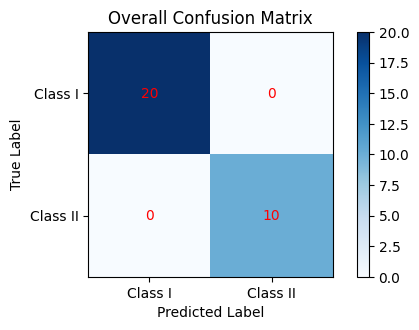

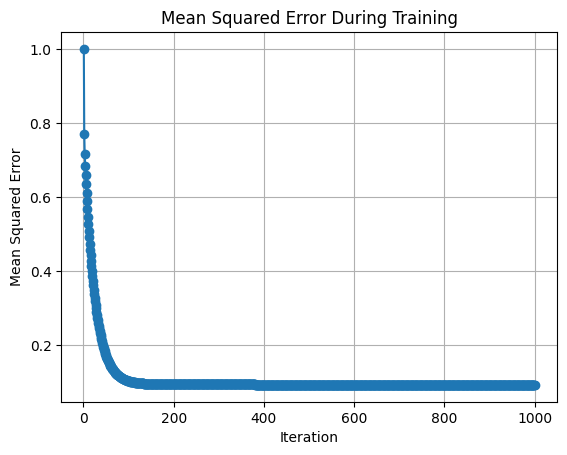

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


iris = load_iris()

X_class_1 = iris.data[iris.target == 0]
X_class_2_3 = iris.data[iris.target != 0]
y_class_1 = np.ones(X_class_1.shape[0])
y_class_2_3 = -np.ones(X_class_2_3.shape[0])

X_train_c1, X_test_c1, y_train_c1, y_test_c1 = train_test_split(X_class_1, y_class_1, test_size=0.2, random_state=42)

X_train_c2, X_test_c2, y_train_c2, y_test_c2 = train_test_split(X_class_2_3, y_class_2_3, test_size=0.2, random_state=42)

X_train = np.vstack((X_train_c1, X_train_c2))
y_train = np.hstack((y_train_c1, y_train_c2))

model = LR()
model.fit(X_train, y_train)

X_test = np.vstack((X_test_c1, X_test_c2))
y_test = np.hstack((y_test_c1, y_test_c2))
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Total Accuracy:", accuracy)
mse = model.mse(X_test, y_test)
print("Mean Squared Error:", mse)
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:\n", class_report)
# Visualizing confusion matrix for overall classification
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.title("Overall Confusion Matrix")
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Class I', 'Class II'])
plt.yticks([0, 1], ['Class I', 'Class II'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')
plt.tight_layout()
plt.show()
model.plot_mse()

Total Accuracy: 0.6666666666666666
Mean Squared Error: 1.3333333333333333
Confusion Matrix:
 [[19  1]
 [ 9  1]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.68      0.95      0.79        20
         1.0       0.50      0.10      0.17        10

    accuracy                           0.67        30
   macro avg       0.59      0.53      0.48        30
weighted avg       0.62      0.67      0.58        30



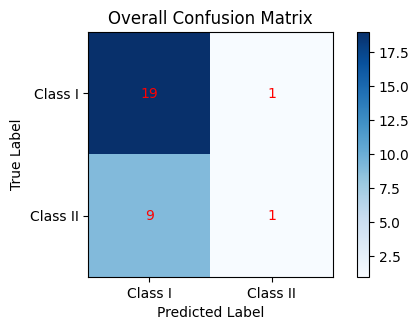

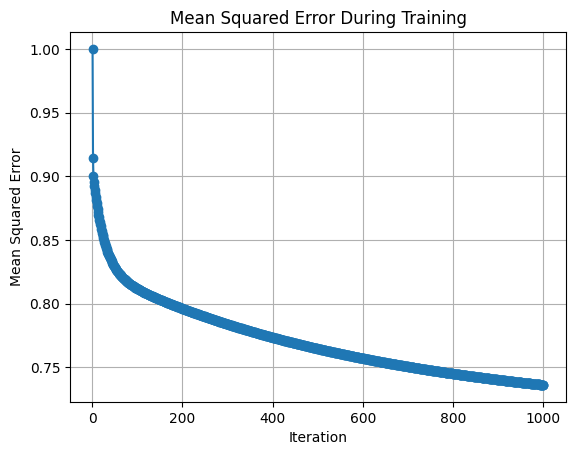

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()

X_class_2 = iris.data[iris.target == 1]
X_class_1_3 = iris.data[iris.target != 1]
y_class_2 = np.ones(X_class_2.shape[0])
y_class_1_3 = -np.ones(X_class_1_3.shape[0])

X_train_c1, X_test_c1, y_train_c1, y_test_c1 = train_test_split(X_class_2, y_class_2, test_size=0.2, random_state=42)

X_train_c2, X_test_c2, y_train_c2, y_test_c2 = train_test_split(X_class_1_3, y_class_1_3, test_size=0.2, random_state=42)

X_train = np.vstack((X_train_c1, X_train_c2))
y_train = np.hstack((y_train_c1, y_train_c2))

model = LR()
model.fit(X_train, y_train)

X_test = np.vstack((X_test_c1, X_test_c2))
y_test = np.hstack((y_test_c1, y_test_c2))
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Total Accuracy:", accuracy)
mse = model.mse(X_test, y_test)
print("Mean Squared Error:", mse)
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:\n", class_report)
# Visualizing confusion matrix for overall classification
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.title("Overall Confusion Matrix")
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Class I', 'Class II'])
plt.yticks([0, 1], ['Class I', 'Class II'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')
plt.tight_layout()
plt.show()
model.plot_mse()

Total Accuracy: 0.7333333333333333
Mean Squared Error: 1.0666666666666667
Confusion Matrix:
 [[20  0]
 [ 8  2]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.71      1.00      0.83        20
         1.0       1.00      0.20      0.33        10

    accuracy                           0.73        30
   macro avg       0.86      0.60      0.58        30
weighted avg       0.81      0.73      0.67        30



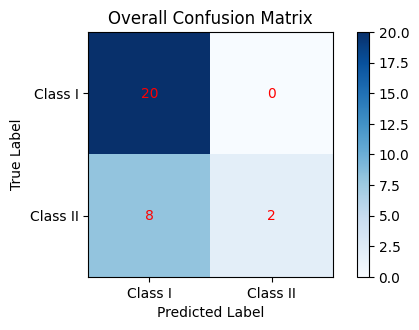

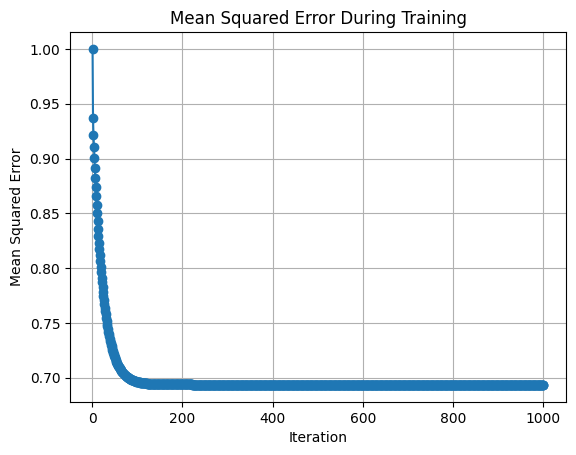

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()

X_class_3 = iris.data[iris.target == 2]
X_class_1_2 = iris.data[iris.target != 1]
y_class_3 = np.ones(X_class_3.shape[0])
y_class_1_2 = -np.ones(X_class_1_2.shape[0])

X_train_c1, X_test_c1, y_train_c1, y_test_c1 = train_test_split(X_class_3, y_class_3, test_size=0.2, random_state=42)

X_train_c2, X_test_c2, y_train_c2, y_test_c2 = train_test_split(X_class_1_2, y_class_1_2, test_size=0.2, random_state=42)

X_train = np.vstack((X_train_c1, X_train_c2))
y_train = np.hstack((y_train_c1, y_train_c2))

model = LR()
model.fit(X_train, y_train)

X_test = np.vstack((X_test_c1, X_test_c2))
y_test = np.hstack((y_test_c1, y_test_c2))
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Total Accuracy:", accuracy)
mse = model.mse(X_test, y_test)
print("Mean Squared Error:", mse)
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:\n", class_report)
# Visualizing confusion matrix for overall classification
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.title("Overall Confusion Matrix")
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Class I', 'Class II'])
plt.yticks([0, 1], ['Class I', 'Class II'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')
plt.tight_layout()
plt.show()
model.plot_mse()